# **Problem statement:**

 To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**1. Data Reading/Data Understanding:** Defining the path for train and test images

In [ ]:
import pathlib

# Defining the path for train and test images

data_dir_train = pathlib.Path('/content/drive/MyDrive/colab_notebook/CNN_Dataset/Train')
data_dir_test = pathlib.Path('/content/drive/MyDrive/colab_notebook/CNN_Dataset/Test')

In [ ]:
# Importing libraries

import os
import PIL
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np, pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


In [ ]:
# Retrieve number of images present in train dataset
img_count_train = len(list(data_dir_train.glob("*/*.jpg")))
print(img_count_train)

# Retrieve number of images present in test dataset
img_count_test = len(list(data_dir_test.glob("*/*.jpg")))
print(img_count_test)

2240
118


**2. Dataset Creation:** Creating train & validation dataset from the train directory with a batch size of 32. Also, making sure to resize images to 180*180.

In [ ]:
# Defining parameters

batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Training data

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9488 files belonging to 9 classes.
Using 7591 files for training.


In [ ]:
# Validation data

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9488 files belonging to 9 classes.
Using 1897 files for validation.


**3. Dataset visualisation:** Visualizing one instance of all the nine classes present in the dataset

In [ ]:
# Listing all the 9 classes

class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


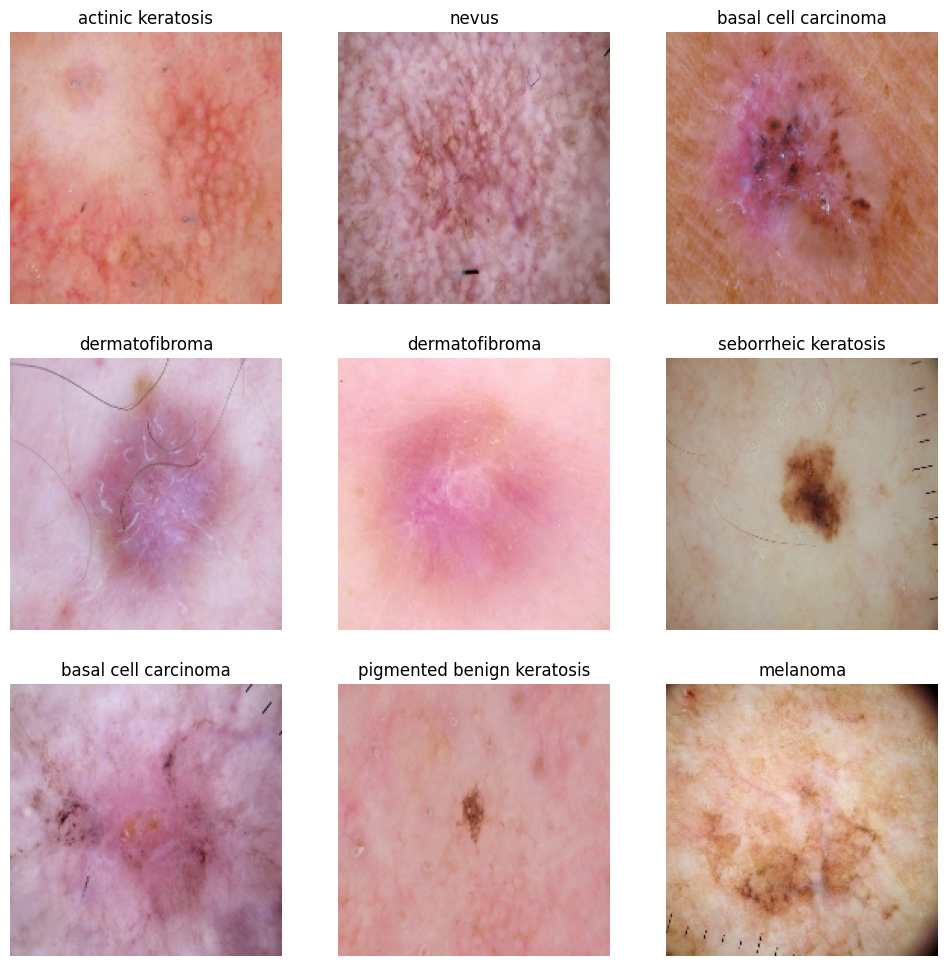

In [ ]:
# Visualizing classes

plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.title(class_names[labels[i]])
    plt.axis("off")
    plt.imshow(images[i].numpy().astype("uint8"))

Insights: The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

In [ ]:
# cache() keeps the images in memory after they're loaded off disk during the first epoch.
# prefetch() overlaps data preprocessing and model execution while training.

AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**4. Model Building & training:**

**Model 1**

In [ ]:
classes = 9

model1 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

# Choosing an appropirate optimiser and loss function
model1.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Viewing the summary of model
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [ ]:
#Training the model for ~20 epochs
epochs = 20

history = model1.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
238/238 [==============================] - 1661s 1s/step - loss: 1.7090 - accuracy: 0.3661 - val_loss: 1.4290 - val_accuracy: 0.4929
Epoch 2/20
238/238 [==============================] - 5s 19ms/step - loss: 1.2840 - accuracy: 0.5335 - val_loss: 1.2556 - val_accuracy: 0.5356
Epoch 3/20
238/238 [==============================] - 4s 19ms/step - loss: 0.9864 - accuracy: 0.6516 - val_loss: 0.9080 - val_accuracy: 0.6726
Epoch 4/20
238/238 [==============================] - 5s 20ms/step - loss: 0.7588 - accuracy: 0.7274 - val_loss: 0.8615 - val_accuracy: 0.7211
Epoch 5/20
238/238 [==============================] - 4s 19ms/step - loss: 0.5757 - accuracy: 0.7946 - val_loss: 0.6297 - val_accuracy: 0.7791
Epoch 6/20
238/238 [==============================] - 5s 21ms/step - loss: 0.4635 - accuracy: 0.8332 - val_loss: 0.6869 - val_accuracy: 0.7717
Epoch 7/20
238/238 [==============================] - 5s 23ms/step - loss: 0.3421 - accuracy: 0.8742 - val_loss: 0.5752 - val_accuracy: 0.805

In [ ]:
# Define function to visualize results
def results(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)

  plt.figure(figsize=(8, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.show()

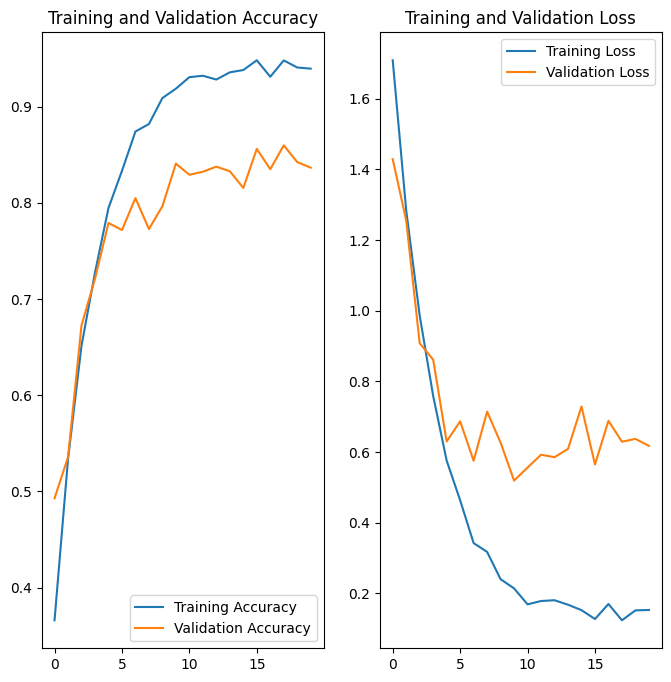

In [ ]:
results(history)

The graph shows that training accuracy is much higher than validation accuracy. Around the 19th and 20th epochs, we can also notice differences in loss functions in training and validation data. This is a clear instance of overfitting, in which the model learnt too much from the training dataset and is unable to perform well on the validation dataset.


**5. Model Building & training on the augmented data :**

**Model 2**

In [ ]:
# Data Augumentation

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
# Using Dropout layer for handling overfitting

model2 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

model2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
# Viewing the summary of model
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 90, 90, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                 

In [ ]:
#Training the model for ~20 epochs
epochs = 20

history_1 = model2.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
238/238 [==============================] - 10s 30ms/step - loss: 1.7100 - accuracy: 0.3596 - val_loss: 1.4758 - val_accuracy: 0.4175
Epoch 2/20
238/238 [==============================] - 7s 28ms/step - loss: 1.4117 - accuracy: 0.4872 - val_loss: 1.4017 - val_accuracy: 0.4760
Epoch 3/20
238/238 [==============================] - 7s 29ms/step - loss: 1.2996 - accuracy: 0.5209 - val_loss: 1.2996 - val_accuracy: 0.5134
Epoch 4/20
238/238 [==============================] - 7s 28ms/step - loss: 1.2258 - accuracy: 0.5449 - val_loss: 1.1326 - val_accuracy: 0.5809
Epoch 5/20
238/238 [==============================] - 7s 30ms/step - loss: 1.1423 - accuracy: 0.5800 - val_loss: 1.1692 - val_accuracy: 0.5762
Epoch 6/20
238/238 [==============================] - 7s 28ms/step - loss: 1.0943 - accuracy: 0.5998 - val_loss: 1.0572 - val_accuracy: 0.6115
Epoch 7/20
238/238 [==============================] - 7s 29ms/step - loss: 1.0116 - accuracy: 0.6253 - val_loss: 1.1596 - val_accuracy: 0.576

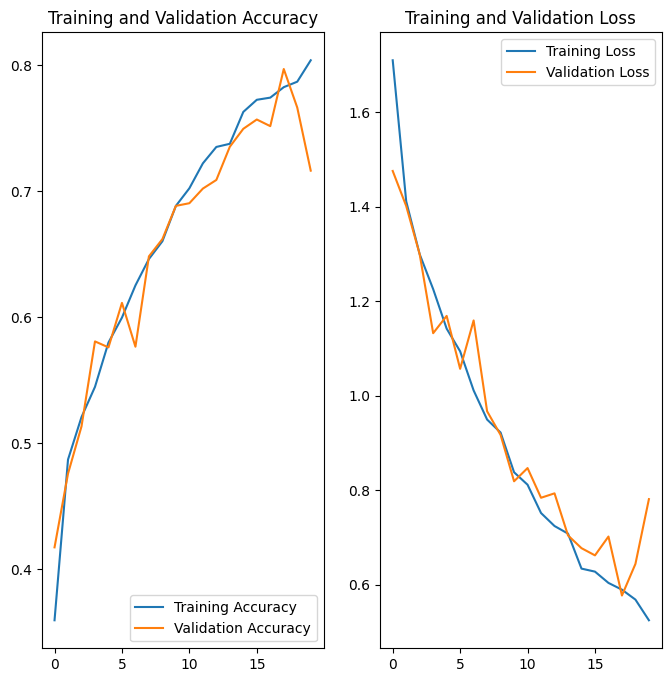

In [ ]:
results(history_1)

Training accuracy has not increased when compared to the basic model, however the gap between training and validation accuracy has narrowed. In addition, validation accuracy is marginally improved over the original model. The gap between training loss and validation loss is also narrowed. And we see that overfitting has been decreased as a result of data augmentation.


**6. Class distribution:**

<BarContainer object of 9 artists>

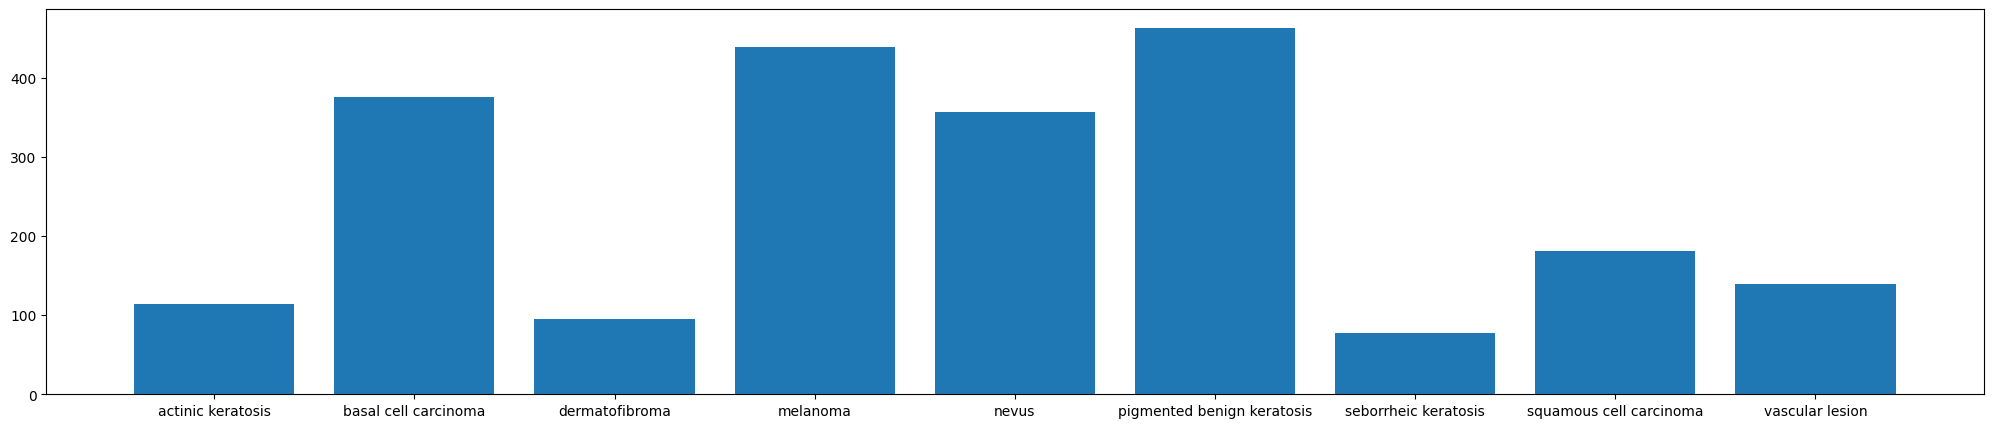

In [ ]:
# Ploting the number of images in each Class
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'/*.jpg'))))
plt.figure(figsize=(25,5))
plt.bar(class_names,count)

In [ ]:
!pip install Augmentor

In [ ]:
# To add more samples across all classes so that none of the classes have very few samples we use Augmentor.
import Augmentor

path_to_training_dataset=str(data_dir_train)+'/'

# We are adding 500 samples per class to make sure that none of the classes are sparse.
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A68D0579180>: 100%|██████████| 500/500 [00:19<00:00, 25.57 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A688B97FAC0>: 100%|██████████| 500/500 [00:21<00:00, 22.81 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A68D059CDF0>: 100%|██████████| 500/500 [00:24<00:00, 20.53 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2816x2112 at 0x7A68D011A9E0>: 100%|██████████| 500/500 [01:23<00:00,  5.96 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A68E83BCA60>: 100%|██████████| 500/500 [01:17<00:00,  6.46 Samples/s]


Initialised with 463 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A68D0119DB0>: 100%|██████████| 500/500 [00:17<00:00, 28.68 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A68D05F3100>: 100%|██████████| 500/500 [00:40<00:00, 12.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A68E83474C0>: 100%|██████████| 500/500 [00:16<00:00, 29.58 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/MyDrive/colab_notebook/CNN_Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A68D0536200>: 100%|██████████| 500/500 [00:17<00:00, 28.96 Samples/s]


<BarContainer object of 9 artists>

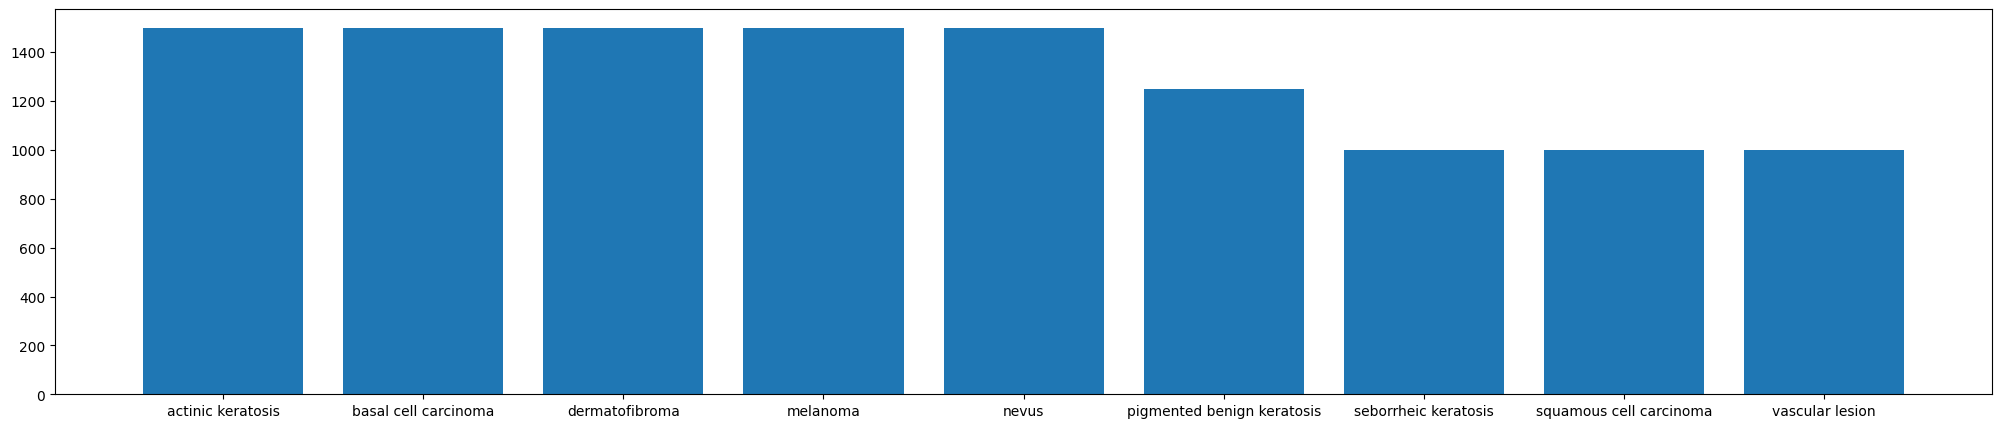

In [ ]:
# Checking the distribution of data
count=[]
for name in class_names:
    count.append(len(list(data_dir_train.glob(name+'*/output/*.jpg'))))
plt.figure(figsize=(25,5))
plt.bar(class_names,count)

In [ ]:
# Lets take a look at total count of augmented images.
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

11748


In [ ]:
from glob import glob
# Getting the path of new data
path_list_new = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# Getting the list of names
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# Creating a dataframe
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
# Get Existing images in Dataframe
path_list=[]
lesion_list=[]
for name in class_names:
  for file in data_dir_train.glob(name+'/*.jpg'):
    path_list.append(str(file))
    lesion_list.append(name)

dataframe_dict_original=dict(zip(path_list,lesion_list))
original_df=pd.DataFrame(list(dataframe_dict_original.items()),columns=['Path','Label'])

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

new_df['Label'].value_counts()

<ipython-input-28-c6392d5ab9e0>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_df = original_df.append(df2)


melanoma                      1938
basal cell carcinoma          1876
nevus                         1857
pigmented benign keratosis    1711
actinic keratosis             1614
dermatofibroma                1595
squamous cell carcinoma       1181
vascular lesion               1139
seborrheic keratosis          1077
Name: Label, dtype: int64

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13988 files belonging to 9 classes.
Using 11191 files for training.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 13988 files belonging to 9 classes.
Using 2797 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

**6. Model Building & training on the rectified class imbalance data :**

**Model 3**

In [ ]:
model3 = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(classes)
])

# Viewing the summary of model
model3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
#Training the model for ~30 epochs
epochs = 30

history_2 = model3.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/30
350/350 [==============================] - 91s 85ms/step - loss: 1.6158 - accuracy: 0.3886 - val_loss: 1.2975 - val_accuracy: 0.5406
Epoch 2/30
350/350 [==============================] - 9s 27ms/step - loss: 1.1232 - accuracy: 0.5795 - val_loss: 0.8829 - val_accuracy: 0.6764
Epoch 3/30
350/350 [==============================] - 9s 26ms/step - loss: 0.8371 - accuracy: 0.6971 - val_loss: 0.7274 - val_accuracy: 0.7361
Epoch 4/30
350/350 [==============================] - 9s 27ms/step - loss: 0.5859 - accuracy: 0.7845 - val_loss: 0.6866 - val_accuracy: 0.7519
Epoch 5/30
350/350 [==============================] - 10s 28ms/step - loss: 0.4335 - accuracy: 0.8413 - val_loss: 0.5168 - val_accuracy: 0.8134
Epoch 6/30
350/350 [==============================] - 9s 26ms/step - loss: 0.3413 - accuracy: 0.8738 - val_loss: 0.3879 - val_accuracy: 0.8598
Epoch 7/30
350/350 [==============================] - 9s 27ms/step - loss: 0.2895 - accuracy: 0.8904 - val_loss: 0.3658 - val_accuracy: 0.87

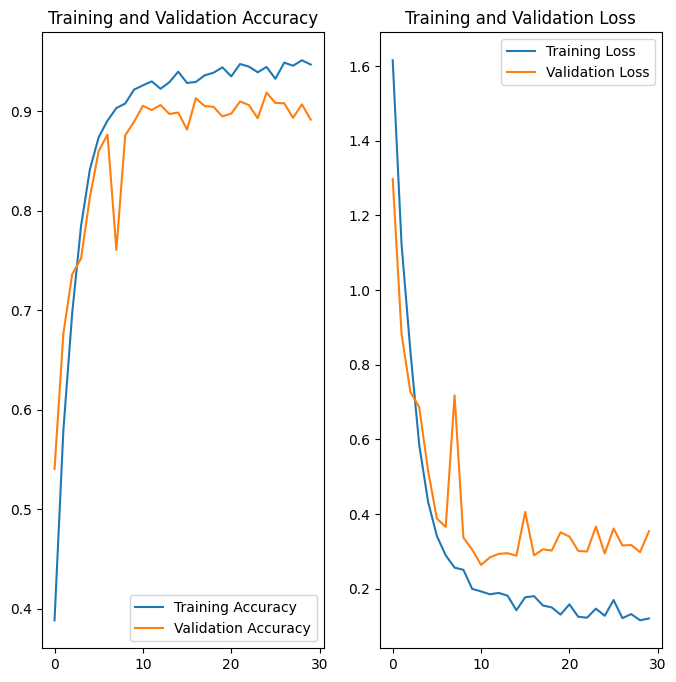

In [ ]:
results(history_2)

Because to augmentation and class imbalance management, training and validation accuracy has enhanced dramatically. The model does not overfit. This model can serve as the final model.
